# In-Class Project: sklearn
# Ben Maves, Luis Ruffino

### Step 1: Packages and Data Setup

Run the following cell to import necessary modules for this project. Install necessary packages.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import sklearn.decomposition as dec
import sklearn.datasets as ds

sklearn has some built in toy datasets. Lets use one to try out our PCA!

In [81]:
# Load the dataset from sklearn and inspect it a bit
iris = ds.load_iris()
data = iris.data
labels = iris.target
print(iris.feature_names, iris.target_names) #our data has 4 different features with 3 different classifications

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


Let's plot some of our data to see visualize features. 

Text(0, 0.5, 'sepal width (cm)')

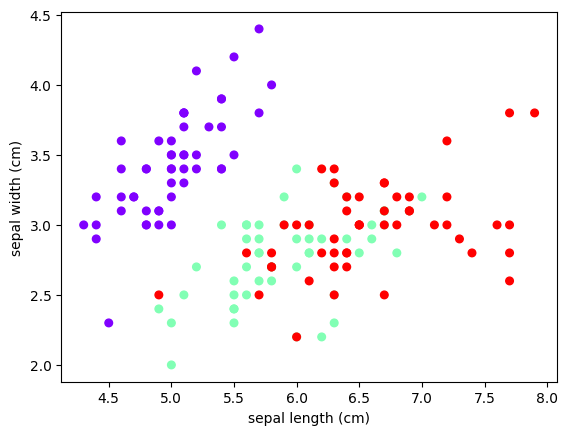

In [101]:
plt.scatter(  data[:,0]   ,data[:,1], c=labels, s=30, cmap=plt.cm.rainbow);
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')


Are our 3 classifications linearly seperable? Two of our classifications have significant overlap. Maybe we kind find a new dimension where there is less overlap. Let's do a PCA

### Step 2: PCA

sklearn has a built in function. Take a look at the documentation here: [sklearn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) 

In [104]:
pca = dec.PCA()
pca_data = pca.fit_transform(data)

This transforms our data in terms of it's principle components. Lets now find out some more information about these principle components. Can you find the eigenvalues of each of our principle components (Look through the documentation)? Print out the eigenvalues and how much of the total variance each explains. 

In [105]:
#print out principle component eigenvalues and their vairance


Hopefully you see that the last 3 eigenvalues are pretty small. The first eigenvalue should account for ~92% of the total information.

But what are the most imformative features in the dataset? The eigenvalues do not tell us any informationn about what features are most impportant to each of our principle components. To find which features are the most important lets print out our eigenvectors. Our eigenvectors are our principle components.

In [106]:
for i, eigv in zip(["first", "second", "third", "fourth"], pca.components_):
    print(f"The elements of the {i} eigenvector are: ", eigv) 

The elements of the first eigenvector are:  [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
The elements of the second eigenvector are:  [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
The elements of the third eigenvector are:  [-0.58202985  0.59791083  0.07623608  0.54583143]
The elements of the fourth eigenvector are:  [-0.31548719  0.3197231   0.47983899 -0.75365743]


Okay! Finally let's plot our data in our new dimensions. Plot the data in terms of the first 2 principle components and compare with how it looks compared to the 2 features we plotted before. Is it linearly spereable now?

Text(0, 0.5, 'Sepal Width [cm]')

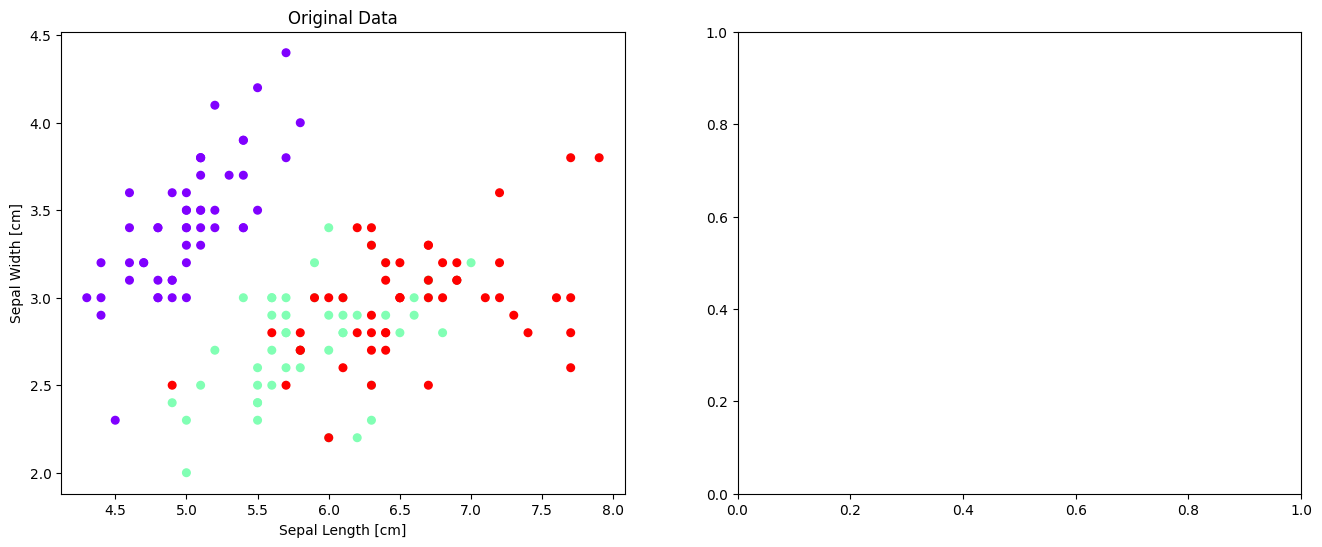

In [120]:
fig, ax = plt.subplots(1,2, figsize = (16, 6))
# Plot the original data
ax[0].scatter(iris.data[:,0], iris.data[:,1], c=target, s=30, cmap=plt.cm.rainbow)
ax[0].set_title("Original Data")
ax[0].set_xlabel("Sepal Length [cm]")
ax[0].set_ylabel("Sepal Width [cm]")
# Plot the transformed data


Hopefully our data is now linearly seperable! Can you find a line which seperates our 3 classes? You can do this by hand or using the sklearn package(sklearn.svm.SVC).

In [121]:
#seperate our classes in PCA space!
